In [14]:
print("Assignment 1: Recognize a Digit using Machine Learning")
print("Submitted By: Krsihna Nath")
print("Date: 10-08-2025")

Assignment 1: Recognize a Digit using Machine Learning
Submitted By: Krsihna Nath
Date: 10-08-2025


##Step 1: Importing Libraries
We import the necessary Python libraries:
- **TensorFlow** for building and training our neural network.
- **MNIST dataset** comes preloaded in TensorFlow.
- **Matplotlib** for plotting images and visualizing results.
- **NumPy** for handling numerical operations.


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


## Step 2: Load the MNIST Dataset
The MNIST dataset contains:
- **60,000 training images**
- **10,000 test images**
Each image is **28x28 pixels**, grayscale, showing digits 0–9.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


## Step 3: Preprocess the Data
- **Normalization**: Convert pixel values from [0, 255] to [0, 1] for faster training.
- **One-hot encoding**: Convert labels (0–9) into a vector format for classification.


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


## Step 4: Build the Neural Network Model
We use the **Sequential API** in Keras to stack layers:
1. **Flatten**: Convert 2D images into 1D vectors.
2. **Dense(128, relu)**: Hidden layer with 128 neurons, ReLU activation.
3. **Dense(10, softmax)**: Output layer for 10 classes (digits 0–9).


In [8]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Step 5: Compile the Model
We define:
- **Optimizer**: 'adam' (efficient gradient descent method)
- **Loss function**: 'categorical_crossentropy' for multi-class classification
- **Metrics**: Track accuracy during training


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Step 6: Train the Model
We train for **5 epochs**, using the training set and validating on the test set.


In [10]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8776 - loss: 0.4338 - val_accuracy: 0.9590 - val_loss: 0.1371
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9648 - loss: 0.1181 - val_accuracy: 0.9722 - val_loss: 0.0924
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9766 - loss: 0.0784 - val_accuracy: 0.9761 - val_loss: 0.0809
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9835 - loss: 0.0551 - val_accuracy: 0.9760 - val_loss: 0.0779
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9873 - loss: 0.0407 - val_accuracy: 0.9764 - val_loss: 0.0768


## Step 7: Evaluate the Model
We check the model's performance on the unseen test data.


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0890
Test accuracy: 0.9764


## Step 8: Save the Model
We save the trained model in the modern `.keras` format for later use.


In [12]:
model.save("digit_recognition_model.keras")


## Step 9: Make Predictions and Visualize
We take the first 10 test images:
- Display the image
- Show **true label** and **predicted label**


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


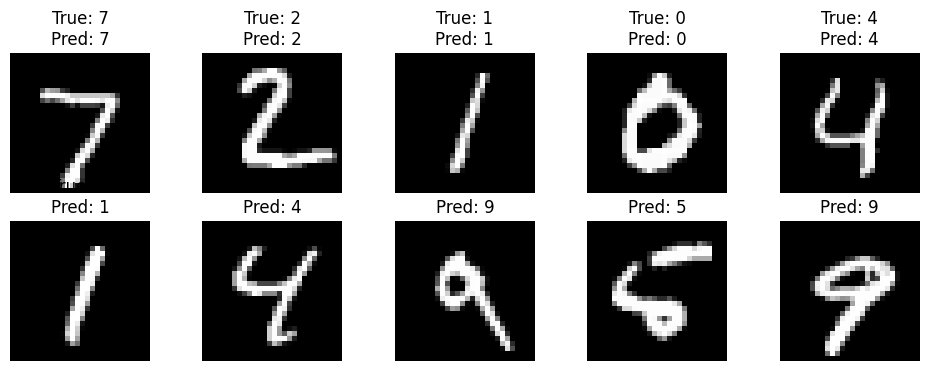

In [13]:
num_images = 10
images = x_test[:num_images]
labels = np.argmax(y_test[:num_images], axis=1)

predictions = model.predict(images)

plt.figure(figsize=(12, 4))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"True: {labels[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()
